## 2.1 经验误差与过拟合

- 错误率：分类后错误样本占总样本的比例（E=a/m）
- 精度：1-错误率
- 误差：预测值和真实值的差异
- 经验误差：学习器在训练数据上的误差
- 泛化误差：学习器在新样本上的误差

学习的目标就是减小泛化误差

- 过拟合：模型学习能力太强，把噪声或偶发性数据当成了主要特征。
- 欠拟合：模型学习能力太弱，无法捕捉必要的规律，比如把所有绿色的东西都当作树叶。

如何解决过拟合：

1. 降低模型的复杂度。
2. 使用正则化L1、L2正则，Dropout技术。
3. 从数据出发：数据增强或者增加训练样本
4. 交叉验证或早停。

如何解决欠拟合：

1. 换模型，换表达能力更强的模型，线性->多项式，逻辑回归->神经网络。
2. 增加训练轮数
3. 提升输入数据质量。


## 2.2 评估方法
使用“测试集”，计算“测试误差”作为泛化误差的近似。

#### 2.2.1 留出法
把一部分训练数据用作测试集，比如80%训练，20%做测试。

#### 2.2.2 交叉验证法

将数据集多次划分为训练集和验证集，多次训练和评估，最终取均值。

K折交叉验证(K-Fold Cross Validation):

1. 将原始数据集平均划分为 K 份（folds）；

2. 每次使用其中 K−1 份作为训练集，剩下 1 份作为验证集；

3. 重复 K 次，每一份都作为一次验证集；

4. 将这 K 次的评估结果取平均，作为最终模型性能指标。

#### 2.2.3 自助法

对原始样本进行又放回的重复抽样，构建多个伪训练集和伪测试集。

具体来说：

1. 从整个训练数据D中抽取m次，构成新的数据集D'，这个作为训练集。
2. 用未被抽中的样本D-D'作为测试集评估模型。
3. 重复上述过程多次，求平均值。

$(1 - \frac{1}{m})^m \approx 1/e \approx 36.8\%$

这种方法的局限性在于改变了数据集的分布，这会引入偏差。

#### 2.2.4 调参与最终模型

我们通常使用一部分数据进行模型训练和参数优化，但是实际上我们在选择模型和确定好参数后，应该用全量数据D进行重新训练，这个才是我们最终提交给用户的模型。





## 2.3 性能度量

#### 2.3.1 错误率与精度

一、错误率（Error Rate）

> 错误率是指模型在所有预测中，**预测错误的样本所占的比例**。

$$
\text{错误率} = \frac{\text{预测错误的样本数}}{\text{总样本数}} = \frac{a}{m}
$$

其中：

* $a$：预测错误的样本数（即模型输出 ≠ 实际标签）
* $m$：总样本数
  
二、精度 / 准确率（Accuracy）

> 精度（准确率）是指模型在所有预测中，**预测正确的样本所占的比例**。

$$
\text{精度（准确率）} = \frac{\text{预测正确的样本数}}{\text{总样本数}} = \frac{m - a}{m}
$$

或者写成与错误率的关系：

$$
\text{精度} = 1 - \text{错误率}
$$



#### 2.3.2 查准率、查全率与F1
> 查准率（Precision）、查全率（Recall）和F1 值（F1-score）是机器学习特别是分类任务中非常重要的评估指标，尤其适用于样本类别不均衡或对“正例”特别敏感的问题（如欺诈检测、疾病预测等）。

为什么需要这些指标？

> 有时候我们不会只关注总体上预测的准确率有多少，我们还要关心模型挑出来的好瓜有多少是真的好瓜（查准率），又有多少真的好瓜没有被模型识别到（查全率）。


✅ 先看分类混淆矩阵（Confusion Matrix）

我们先引入二分类的四种预测结果：

| 实际 \ 预测        | 预测为正（Positive） | 预测为负（Negative） |
| -------------- | -------------- | -------------- |
| 实际为正（Positive） | 真正（TP）         | 假负（FN）         |
| 实际为负（Negative） | 假正（FP）         | 真负（TN）         |

---

✅ 一、查准率（Precision）

📌 定义：

> 在**被模型判为正类的样本中**，实际**真的为正类的比例**。

📐 公式：

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

💡 理解：

你预测了 100 个“是正例”的样本，只有 80 个是真的，那 Precision 就是 80%。

---

✅ 二、查全率（Recall）

📌 定义：

> 在**所有真正的正类样本中**，有多少被模型正确识别为正类。

📐 公式：

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

💡 理解：

实际有 100 个正例，你只找到了其中 80 个，那 Recall 就是 80%。

---

✅ 三、F1 分数（F1-score）

📌 定义：

> F1 是 Precision 和 Recall 的调和平均值，用于综合评估模型的“查得准”与“查得全”的能力。

📐 公式：

$$
\text{F1-score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


---

✅ 举个例子

假设你预测正类的结果如下：

* 实际正类：100 个
* 被预测为正类的样本：90 个
* 其中真正的正类：80 个

那么：

* **Precision = 80 / 90 = 0.89**
* **Recall = 80 / 100 = 0.80**
* **F1 ≈ 2 × (0.89 × 0.80) / (0.89 + 0.80) ≈ 0.84**

---

✅ 总结一句话：

> * **查准率（Precision）**：你“命中”的有多准？
> * **查全率（Recall）**：你“漏掉”的多不多？
> * **F1-score**：你既要“准”，也要“全”时的综合打分。

P-R曲线：

实际上我们不必非要说模型预测值>0.5就是正例，也可以是任意分类域值，那么这里根据从0-1不同的设定，我们可以得到不同的查准率和查全率，把查全率作为x轴，查准率作为y轴，就得到了P-R曲线。

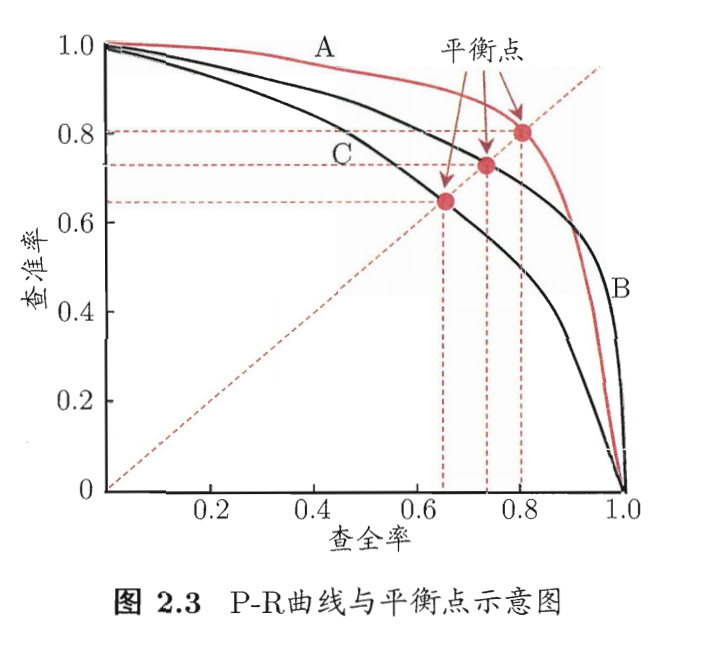

#### 2.3.3 ROC与AUC

**ROC** 和 **AUC** 是评估二分类模型性能的重要指标，特别适合用于**样本类别不均衡**或**需要平衡查准率与查全率**的场景。

---

✅ 一、ROC 曲线（Receiver Operating Characteristic Curve）

📌 定义：

> **ROC 曲线**是以 **假正率（FPR）为横轴**、**真正率（TPR，即 Recall）为纵轴**，随着分类阈值变化而绘制出的曲线。

---

✅ 坐标轴含义：

* **纵轴（TPR / Recall）**：

  $$
  \text{TPR} = \frac{TP}{TP + FN}
  $$

  表示有多少真实的正例被识别出来（查全率）

* **横轴（FPR）**：

  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$

  表示有多少负例被误判为正例，也就是判断失误，这个值应该越小越好

---

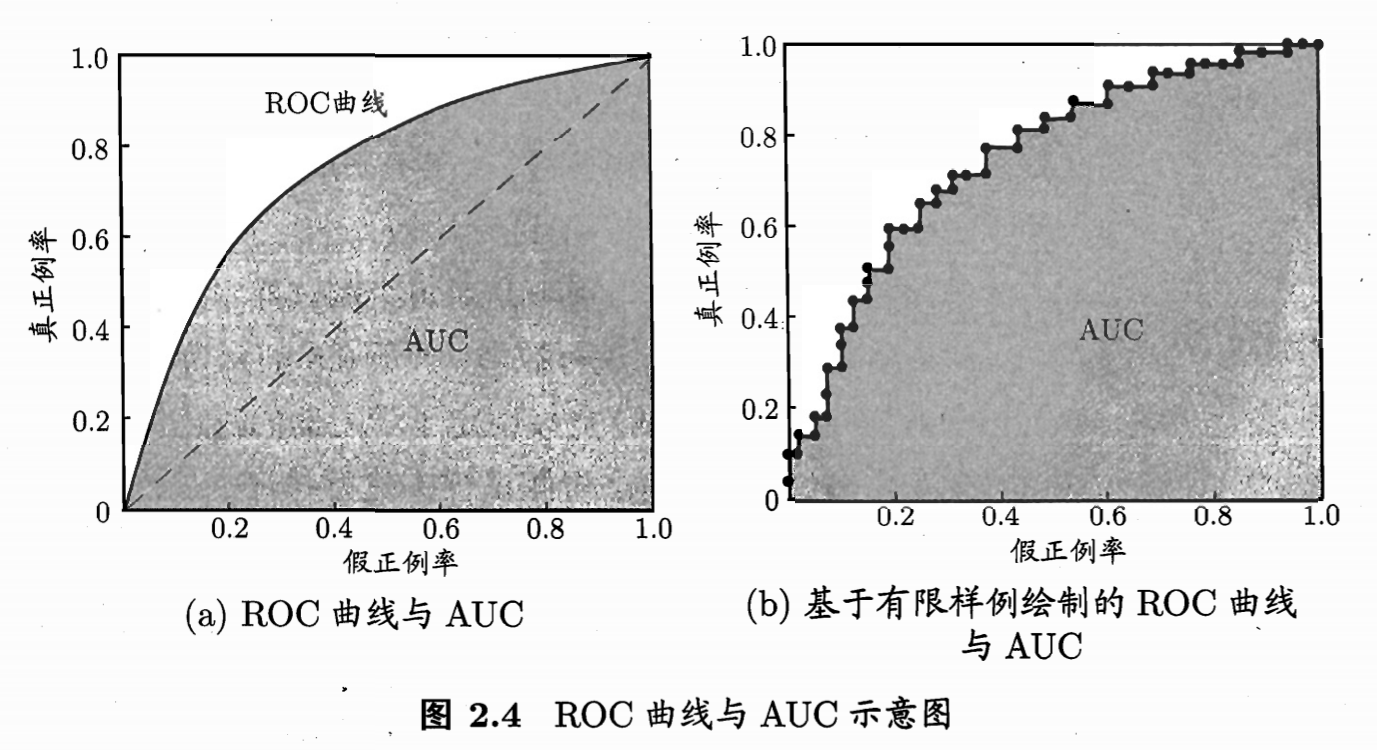


✅ 二、AUC（Area Under the ROC Curve）

📌 定义：

> **AUC（Area Under Curve）** 是 ROC 曲线下的面积，**衡量模型对正负样本的整体区分能力**。

* AUC 的取值范围是 \[0, 1]；
* 理想模型：AUC = 1；
* 随机猜测模型：AUC ≈ 0.5；
* 如果 AUC < 0.5，说明模型预测方向可能反了。

---

✅ 总结一句话：

> **ROC 曲线展示了分类模型在不同阈值下识别正负样本的能力，AUC 则用一个数总结这种能力的整体强弱。**


#### 2.3.4 代价敏感错误率与代价曲线

**代价敏感错误率（Cost-sensitive Error Rate）**与**代价曲线（Cost Curve）**是考虑**不同类型错误所造成代价不同**的一种分类评估方式，尤其适用于“**错误不是等价的**”的实际应用场景，如医疗诊断、金融风控等。

---

一、什么是代价敏感错误率？

📌 定义：

> **代价敏感错误率**是在传统错误率的基础上，考虑了**不同类型错误（假正、假负）所造成的实际代价**，通过引入“代价矩阵”来衡量模型性能。

⚠️ 为什么需要？

在许多任务中：

* 错判一个**健康人是病人**（假阳性）只是多花钱检查；
* 但错判一个**病人是健康人**（假阴性）可能会致命。

这两种错误的**影响不同**，所以不能用简单的“错误率”来衡量模型效果。

---

✅ 代价矩阵举例（成本矩阵）：

| 实际 \ 预测 | 正类（P）    | 负类（N）    |
| ------- | -------- | -------- |
| 正类（P）   | 0        | $C_{FN}$ |
| 负类（N）   | $C_{FP}$ | 0        |

* $C_{FP}$：将负类错判为正类的代价（假阳性代价）
* $C_{FN}$：将正类错判为负类的代价（假阴性代价）

---

✅ 代价敏感错误率公式：

$$
\text{代价敏感错误率} = \frac{1}{m} \sum_{i=1}^{m} C(y_i, \hat{y}_i)
$$

其中：

* $m$：样本总数；
* $y_i$：第 $i$ 个样本的真实类别；
* $\hat{y}_i$：第 $i$ 个样本的预测类别；
* $C(y, \hat{y})$：预测错误时的具体代价（来自代价矩阵）。

---

✅ 二、什么是代价曲线（Cost Curve）？

📌 定义：

> **代价曲线**是展示模型在不同“代价权重”下表现的图形工具，用来评估模型在各种实际代价权衡下的**整体稳定性与适应性**。

✅ 横轴 & 纵轴：

* **横轴：代价比例（Cost proportion）**
  表示我们更关注哪类错误，例如偏向降低假阴性还是假阳性。

* **纵轴：归一化代价（Normalized Cost）**
  当前代价设定下模型的实际错误代价。

---

✅ 总结一句话：

> **代价敏感错误率**衡量了“错误有代价”的现实问题，**代价曲线**可视化模型在不同代价设置下的稳定表现，是更贴近实际业务的评估工具。



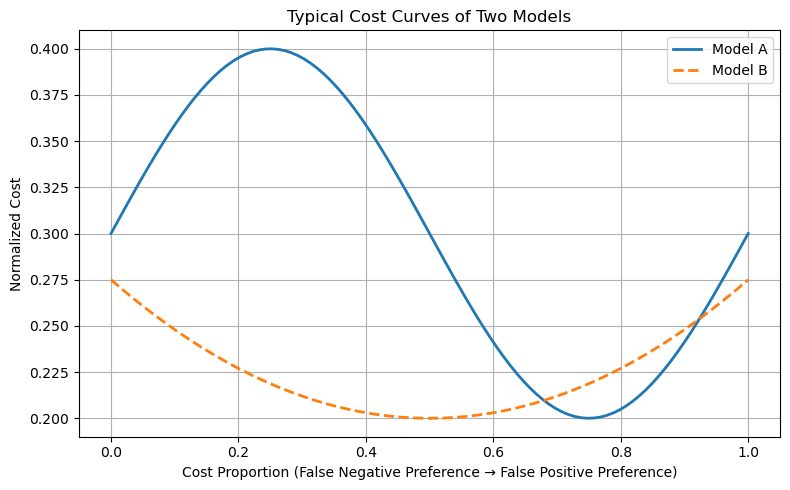

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟代价比例（从更关注假负，到更关注假正）
cost_proportions = np.linspace(0, 1, 100)

# 模拟两个分类器的归一化代价表现（虚构）
# 模型A：整体较稳健
normalized_cost_model_a = 0.3 + 0.1 * np.sin(2 * np.pi * cost_proportions)
# 模型B：对代价不敏感时表现好，但在高代价权重下表现差
normalized_cost_model_b = 0.2 + 0.3 * (cost_proportions - 0.5) ** 2

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(cost_proportions, normalized_cost_model_a, label='Model A', linewidth=2)
plt.plot(cost_proportions, normalized_cost_model_b, label='Model B', linewidth=2, linestyle='--')

plt.xlabel("Cost Proportion (False Negative Preference → False Positive Preference)")
plt.ylabel("Normalized Cost")
plt.title("Typical Cost Curves of Two Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


上图展示了两个典型模型的代价曲线对比：

- Model A：整体表现较稳健，在不同代价偏好下归一化代价波动小，适合广泛应用；

- Model B：在中间代价权重下表现优异，但在极端偏好（非常关注假负或假正）时性能下降明显。
